<a href="https://colab.research.google.com/github/AsadovDovud/Data_Science_Projects/blob/main/2_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mathematical operations on arrays
import numpy as np
# For data analysis and manipulation tool
import pandas as pd
# Importing Dataframe
from pandas import DataFrame
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Implement machine learning models and statistical modelling
import sklearn
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
# Completing missing values with simple strategies
from sklearn.impute import SimpleImputer
# Categorical to integer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
# Building pipline and use automate it
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
# For Checking
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/content/Wine_Quality.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3918 non-null   float64
 1   volatile acidity      3918 non-null   float64
 2   citric acid           3918 non-null   float64
 3   residual sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free sulfur dioxide   3918 non-null   float64
 6   total sulfur dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
 11  quality               3918 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 367.4 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.849834,0.278084,0.334903,6.411639,0.045906,35.540327,138.322231,0.994018,3.187560,0.489135,10.523674,5.879786
std,0.847878,0.100604,0.122489,5.092618,0.022341,17.235522,42.347864,0.003020,0.150232,0.113841,1.229788,0.877829
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,24.000000,108.000000,0.991700,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.975000,0.050000,46.000000,167.000000,0.996158,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.810000,1.010000,14.200000,9.000000


In [6]:
df.corrwith(df.quality)

fixed acidity          -0.123681
volatile acidity       -0.183487
citric acid            -0.020350
residual sugar         -0.101827
chlorides              -0.212180
free sulfur dioxide    -0.012892
total sulfur dioxide   -0.185959
density                -0.309098
pH                      0.098692
sulphates               0.058611
alcohol                 0.439556
quality                 1.000000
dtype: float64

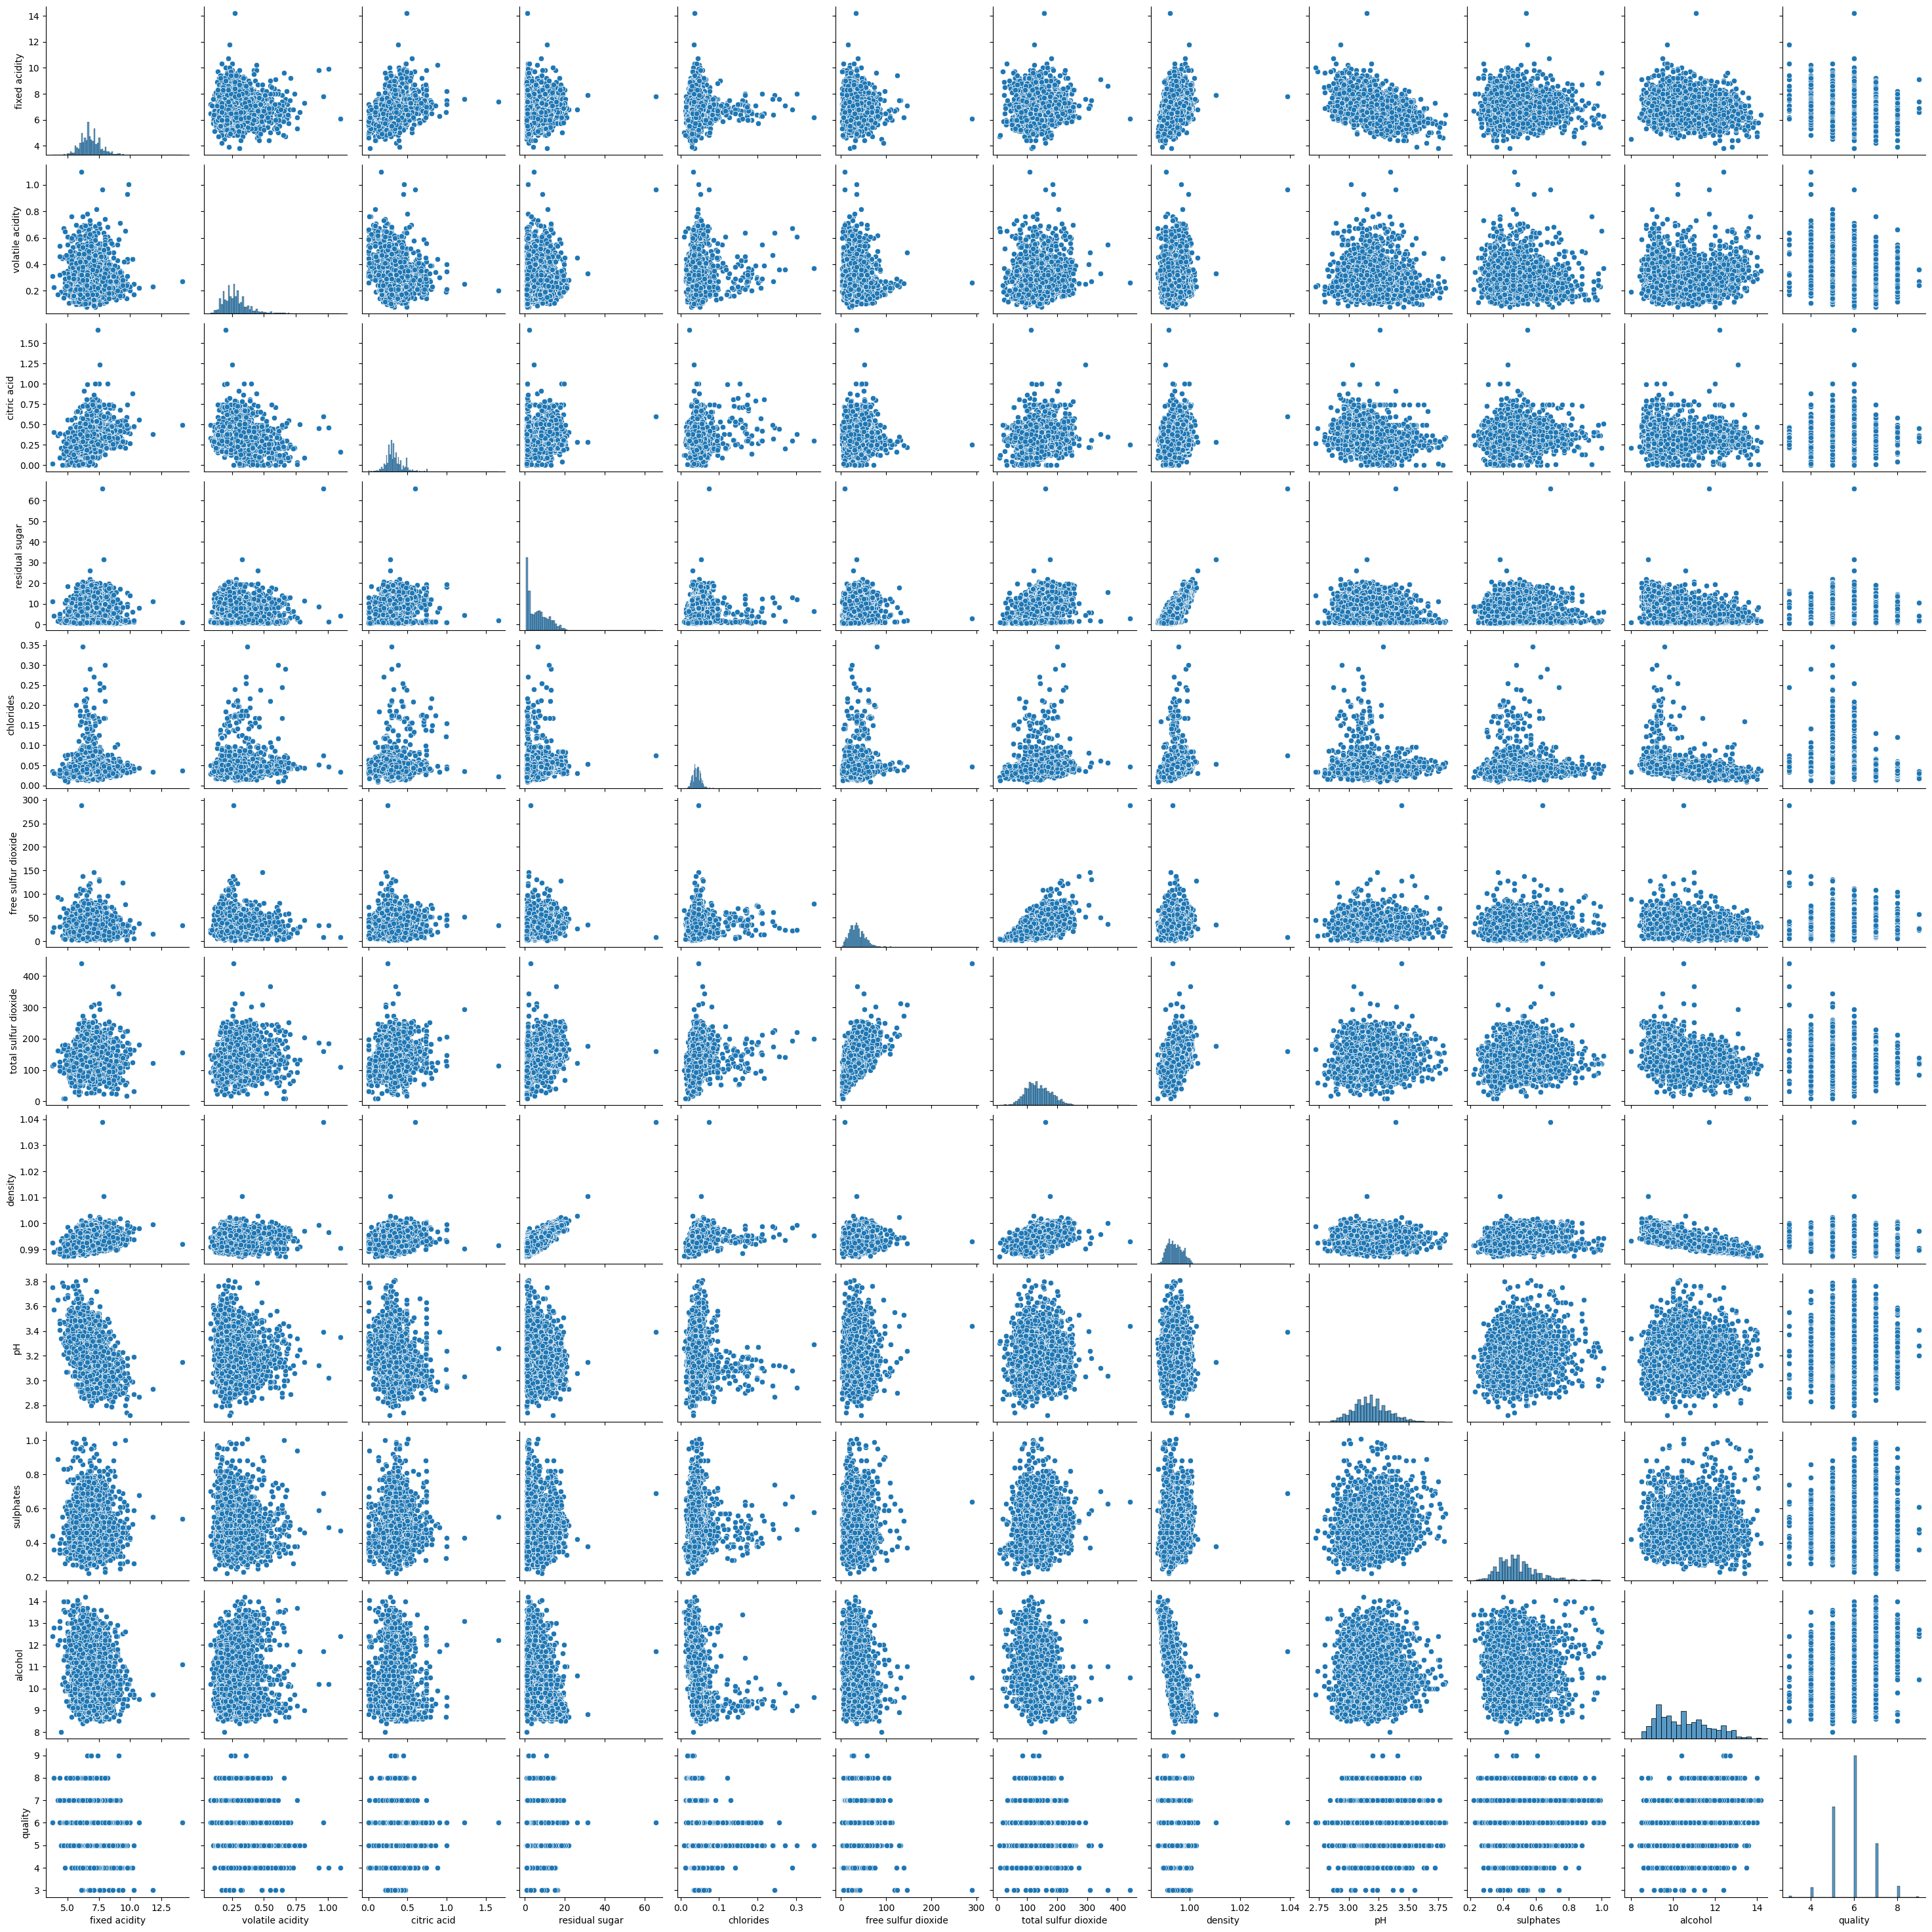

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
x_train = train_set.drop('quality', axis=1)
y_train = train_set.quality

In [13]:
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)

In [16]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

In [22]:
x_df = DataFrame(x_train)

In [24]:
predicted_data = LR_model.predict(x_df)

In [25]:
DataFrame({'Prognoz':predicted_data, 'Real baxosi': y_train})

,Prognoz,Real baxosi
578,6.500673,7
2825,6.003741,6
1298,5.904103,7
3687,6.528530,7
0,5.543299,6
...,...,...
1130,5.288799,3
1294,5.937522,7
860,5.171576,5
3507,5.894423,5


In [26]:
lin_mse = mean_squared_error(predicted_data, y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.7442293604257614


### Test Set

In [27]:
x_test = test_set.drop('quality', axis=1)
y_test = test_set.quality

In [28]:
x_test = min_max_scaler.fit_transform(x_test)

In [29]:
x_df_test = DataFrame(x_test)

In [31]:
predicted_data = LR_model.predict(x_df_test)

In [32]:
DataFrame({'Prognoz':predicted_data, 'Real baxosi': y_test})

,Prognoz,Real baxosi
270,6.395648,7
3365,6.922914,6
803,6.312968,5
2984,6.255963,7
1978,6.723231,6
...,...,...
2077,6.785108,6
785,6.679861,6
1926,6.014756,5
1767,6.934638,7


In [33]:
lin_mse = mean_squared_error(predicted_data, y_test)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.9653038260869523
